In [1]:
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import pickle
from joblib import dump, load

In [2]:
df = pd.read_csv('BNB2019-2024.csv')
df1 = df.reset_index()['Close']
df1

0        11.393217
1        11.869744
2        11.537903
3        11.545945
4        13.811967
           ...    
1810    324.868225
1811    334.245972
1812    354.710815
1813    360.890381
1814    356.580414
Name: Close, Length: 1815, dtype: float64

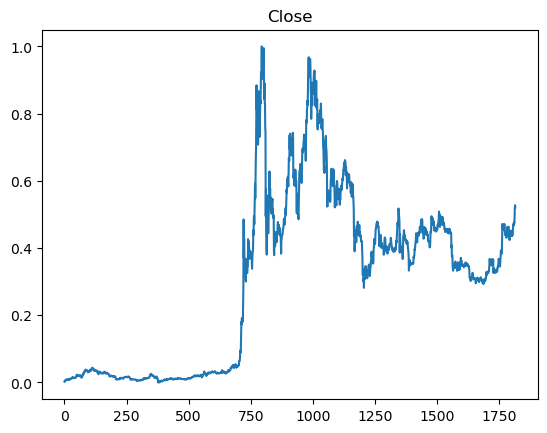

In [29]:
plt.plot(df1)
plt.title("Close")
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [5]:
train_size = int(0.6 * len(df))
test_size = int(0.4 * len(df))


train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]


In [6]:
# 5. Tạo dataset cho mô hình
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
X_train

array([[0.00301242, 0.0037276 , 0.00322957, ..., 0.03315942, 0.03332057,
        0.03403923],
       [0.0037276 , 0.00322957, 0.00324163, ..., 0.03332057, 0.03403923,
        0.03177593],
       [0.00322957, 0.00324163, 0.00664255, ..., 0.03403923, 0.03177593,
        0.03403684],
       ...,
       [0.90934086, 0.93127438, 0.92639695, ..., 0.63488608, 0.62814544,
        0.58992219],
       [0.93127438, 0.92639695, 0.96160884, ..., 0.62814544, 0.58992219,
        0.58559851],
       [0.92639695, 0.96160884, 0.96283046, ..., 0.58992219, 0.58559851,
        0.5863105 ]])

### RandomForest

In [8]:
model=RandomForestRegressor()

In [9]:
# best_parameters

In [10]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
# Lưu mô hình vào file
with open('Model/rf.pkl', 'wb') as file:
    pickle.dump(model, file)

In [12]:
# Tải mô hình từ file
with open('Model/rf.pkl', 'rb') as file:
    rf_model = pickle.load(file)

In [13]:

train_predict = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)


In [14]:
y_pred

array([0.4528099 , 0.4577196 , 0.44609939, 0.44270405, 0.44763307,
       0.44695929, 0.44346581, 0.44242092, 0.440087  , 0.44197045,
       0.43976852, 0.44058892, 0.42610512, 0.42460782, 0.43640617,
       0.42921322, 0.42769301, 0.42580605, 0.42847402, 0.43149753,
       0.43167916, 0.43262694, 0.44162523, 0.44935015, 0.44843381,
       0.44654954, 0.44528754, 0.44237873, 0.43240048, 0.43009074,
       0.42765459, 0.42854348, 0.42722712, 0.43519118, 0.43828377,
       0.44000449, 0.43984422, 0.43970056, 0.44017731, 0.4380223 ,
       0.42767961, 0.42771413, 0.4358126 , 0.44245215, 0.44095087,
       0.44117102, 0.43943238, 0.44099104, 0.44173717, 0.44296389,
       0.44311442, 0.44327294, 0.44066285, 0.43819751, 0.43915087,
       0.43473314, 0.43992025, 0.44137482, 0.44562992, 0.4440648 ,
       0.4419972 , 0.44395687, 0.44591324, 0.45510469, 0.4661851 ,
       0.47432733, 0.47726607, 0.48436607, 0.48636251, 0.48718607,
       0.48876214, 0.48705007, 0.48340926, 0.48264898, 0.47750

In [15]:
# 11. Dự báo giá cho 30 ngày tiếp theo
x_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input[0])
lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps))
        yhat = rf_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps))
        yhat = rf_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        i += 1

lst_output = np.array(lst_output).reshape(-1, 1)

### Bagging

In [16]:
from sklearn.ensemble import BaggingRegressor

In [17]:
# Xây dựng mô hình Bagged
bagged_rf = BaggingRegressor(estimator=rf_model, n_estimators=5, random_state=42)

In [18]:
# Huấn luyện mô hình
bagged_rf.fit(X_train, y_train)

BaggingRegressor(estimator=RandomForestRegressor(), n_estimators=5,
                 random_state=42)

In [19]:
#Lưu mô hình
dump(bagged_rf, 'Model/rf_bagging.joblib')

['Model/rf_bagging.joblib']

In [20]:
# # Tải mô hình
# bagged_rf = load('Model/rf_bagging.joblbi')

In [21]:
#Dự đoán
bagged_train_predict = bagged_rf.predict(X_train)
bagged_y_pred = bagged_rf.predict(X_test)

In [22]:
bagged_y_pred

array([0.44755375, 0.4484799 , 0.43998433, 0.44343143, 0.43963289,
       0.43711483, 0.43561891, 0.43385056, 0.4344993 , 0.43628403,
       0.43691028, 0.43692958, 0.41850031, 0.4159545 , 0.42639207,
       0.41923508, 0.41793936, 0.41833856, 0.41722862, 0.41875484,
       0.41981773, 0.42053367, 0.42746846, 0.43762926, 0.43812341,
       0.43262781, 0.43181081, 0.42644981, 0.41840951, 0.41393993,
       0.407522  , 0.40663493, 0.40678123, 0.41167425, 0.41359449,
       0.41915892, 0.41867487, 0.41856647, 0.41816284, 0.41604497,
       0.4066821 , 0.40695459, 0.4097113 , 0.41909216, 0.41946277,
       0.4193141 , 0.4195542 , 0.42416164, 0.424893  , 0.42512878,
       0.4261879 , 0.42582362, 0.42534431, 0.42646603, 0.42001532,
       0.4201869 , 0.42469287, 0.42479983, 0.42763017, 0.42562823,
       0.42651797, 0.42787459, 0.42842553, 0.4331965 , 0.44809924,
       0.457069  , 0.46318375, 0.4704397 , 0.46912887, 0.47273834,
       0.47381412, 0.46918373, 0.46653782, 0.46827041, 0.46393

In [23]:
# 11. Dự báo giá cho 30 ngày tiếp theo
x_input1 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input1[0])
bagg_lst_output1 = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input1 = np.array(temp_input[1:])
        x_input1 = x_input1.reshape(1, -1)
        x_input1 = x_input1.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input1)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output1.extend(yhat.tolist())
        i += 1
    else:
        x_input1 = x_input1.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input1)
        temp_input.extend(yhat.tolist())
        bagg_lst_output1.extend(yhat.tolist())
        i += 1

bagg_lst_output1 = np.array(bagg_lst_output1).reshape(-1, 1)


In [24]:
# 11. Dự báo giá cho 60 ngày tiếp theo
x_input2 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input2[0])
bagg_lst_output2 = []
n_steps = 100
i = 0
while i < 60:
    if len(temp_input) > 100:
        x_input2 = np.array(temp_input[1:])
        x_input2 = x_input2.reshape(1, -1)
        x_input2 = x_input2.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input2)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output2.extend(yhat.tolist())
        i += 1
    else:
        x_input2 = x_input2.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input2)
        temp_input.extend(yhat.tolist())
        bagg_lst_output2.extend(yhat.tolist())
        i += 1

bagg_lst_output2 = np.array(bagg_lst_output2).reshape(-1, 1)

In [25]:
# 11. Dự báo giá cho 90 ngày tiếp theo
x_input3 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input3[0])
bagg_lst_output3 = []
n_steps = 100
i = 0
while i < 90:
    if len(temp_input) > 100:
        x_input3 = np.array(temp_input[1:])
        x_input3 = x_input3.reshape(1, -1)
        x_input3 = x_input3.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input3)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output3.extend(yhat.tolist())
        i += 1
    else:
        x_input3 = x_input3.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input3)
        temp_input.extend(yhat.tolist())
        bagg_lst_output3.extend(yhat.tolist())
        i += 1

bagg_lst_output3 = np.array(bagg_lst_output3).reshape(-1, 1)

### Trực quan

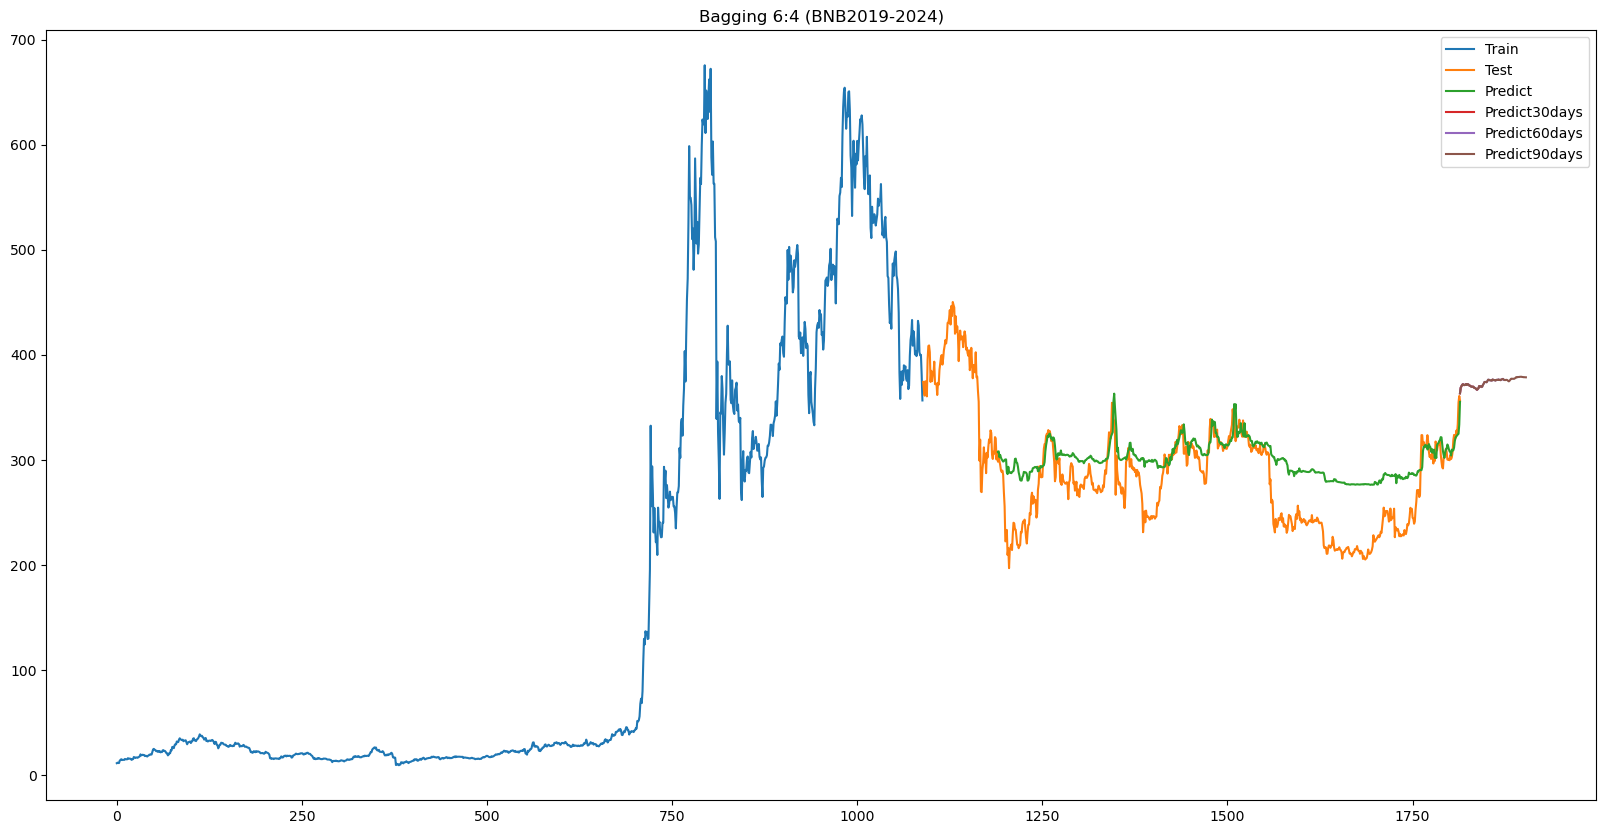

In [26]:
plt.figure(figsize=(20, 10))

plt.title('Bagging 6:4 (BNB2019-2024)')
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(bagged_y_pred.reshape(-1,1)))
prediect_data_index1 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index1,scaler.inverse_transform(bagg_lst_output1))
prediect_data_index2 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index2,scaler.inverse_transform(bagg_lst_output2))
prediect_data_index3 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index3,scaler.inverse_transform(bagg_lst_output3))
plt.legend(['Train','Test','Predict','Predict30days','Predict60days','Predict90days'])
plt.show()

In [27]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler



# Assume you have predictions in the scaled form
predictions_scaled = np.array(bagged_y_pred).reshape(-1, 1)
predictions_scaled1 = np.array(y_test).reshape(-1, 1)

# Inverse transform the scaled predictions
predictions_original = scaler.inverse_transform(predictions_scaled)
predictions_original1 = scaler.inverse_transform(predictions_scaled1)


Predictions after Inverse Transform:


In [28]:
#Đánh giá trên tập test
print("Chỉ số MSE trên tập test")
print("Bagging:", round(metrics.mean_squared_error(y_test, predictions_original), 4))
test_rmse = np.sqrt(np.mean((predictions_original - predictions_original1)**2))
print('Testing RMSE:', test_rmse)
# Tính MAPE
test_mape = np.mean(np.abs((predictions_original - predictions_original1) / y_test)) * 100
print('Testing MAPE:', test_mape)

Chỉ số MSE trên tập test
Bagging: 90412.0888
Testing RMSE: 37.56211524860169
Testing MAPE: 7637.561616793816
